# **APS1080: Introduction to Reinforcement Learning**
---
**Student Name**:

---



**Student ID:**

---
**Assignment 2:** Monte Carlo

------

# **Exercises**
--------
**1. Explain clearly why V_pi is not useful in the MC development above?**


In the context of Monte Carlo methods for reinforcement learning, $𝑉𝜋$ represents the value function under a given policy
$𝜋$. Specifically, $𝑉𝜋(𝑠)$ is the expected return (total discounted reward) starting from state $𝑠$ and following policy $𝜋$ thereafter. In the case of MC, $𝑉𝜋(𝑠)$ is not useful for the following reasons:

- The MC methods discussed are designed for situations where we do not have a model of the environment (transition dynamics $𝑝$). Without a model, we cannot use analytical methods to derive $𝑉_𝜋$.
- To improve the policy from $𝜋_𝑘$ to $𝜋_{𝑘+1}$, we need to know which action $𝑎$ in state $𝑠$ maximizes the expected return. This requires the action-value function $𝑄_{𝜋𝑘}(𝑠,𝑎)$, not just $𝑉_{𝜋𝑘}(𝑠)$.
-Monte Carlo methods are based on sampling and averaging returns to learn value functions. Since we lack the transition dynamics, the focus is on learning through experience. To effectively learn and improve the policy, the agent must explore the entire state-action space $𝑆×𝐴$. This requires a stochastic policy where every action $𝑎$ has a non-zero probability of being chosen in every state $𝑠$. This ensures sufficient coverage of all state-action pairs, which is critical for accurate estimation of $𝑄_k$.
- The requirement for effective learning is that the agent experiences the full state-action space. This means the episodes must cover all possible state-action pairs sufficiently. $𝑉_𝜋$ does not provide direct information about action values, making it less useful for ensuring thorough exploration.
$𝑄_𝜋(𝑠,𝑎)$, on the other hand, directly informs the agent about the value of specific actions in specific states, guiding exploration and policy improvement.
- MC methods involve updating value estimates based on empirical returns from sampled episodes. These updates are naturally formulated in terms of state-action pairs ($𝑄_𝜋(𝑠,𝑎)$) rather than just states.

--



**2. The MC algorithm so far (ref: p 99), requires an infinite number of episodes for Eval to converge on Q_pi_k (step k). We can modify this algorithm to the practical variant where Eval is truncated (c.f., DynProg GPI). In this case:**

--

**a. Will we obtain Q_pi_k from eval?**

With a truncated evaluation in the modified MC algorithm, we will obtain an approximation of $𝑄_{𝜋𝑘}$ rather than the exact $Q_{πk}$.

--

**b. If not why are we able to truncate Eval? Explain clearly.**

We are able to truncate the evaluation because the goal is to iteratively improve the policy rather than to precisely compute
$𝑄_{𝜋k}$. Truncating evaluation still provides useful estimates of action values, allowing for practical and gradual policy improvement. This aligns with the principle of Generalized Policy Iteration (GPI), where approximate evaluations suffice for driving the policy towards optimality over multiple iterations.

--

**c. Assuming ES (i.e., thorough sampling of the S x A space), and the above truncated Eval_trunc, is it possible to converge on a sub-optimal policy pi_c? Is this a stable fixed point of the GPI for MC? Explain clearly.**

It is possible to converge on a sub-optimal policy using truncated evaluation, even with Exploring Starts (ES). This sub-optimal policy can be a stable fixed point of the GPI process because truncated evaluations might introduce approximation errors, and the iterative policy improvement step could stabilize on these sub-optimal approximations. Consequently, the policy may stop improving and converge to a sub-optimal policy.

--

**3. Explain how you can synthesize a stochastic policy given what you know so far (you don't need to read ahead).**

To synthesize a stochastic policy using Monte Carlo methods with Exploring Starts and truncated evaluation, start by initializing a random policy where each action has a non-zero probability of being chosen in each state, and initialize action-value estimates arbitrarily. For each episode, begin from a randomly chosen state-action pair to ensure thorough exploration. Follow the current policy to generate episodes, and for each state-action pair in the episode, calculate and update action-value estimates using truncated returns. Improve the policy by making it epsilon-greedy with respect to the updated action-value estimates, meaning with high probability, choose the best-known action, and with a small probability, choose a random action to encourage exploration. Repeat this process of generating episodes, updating action values, and refining the policy until it stabilizes or a set number of iterations is reached. This iterative approach enables the development of a stochastic policy that effectively balances exploration and exploitation based on sampled experiences.

-----

In [ ]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1

In [ ]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1

In [ ]:
!sudo apt-get install xvfb


In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
from collections import defaultdict


In [ ]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

Iterations that were run: 28


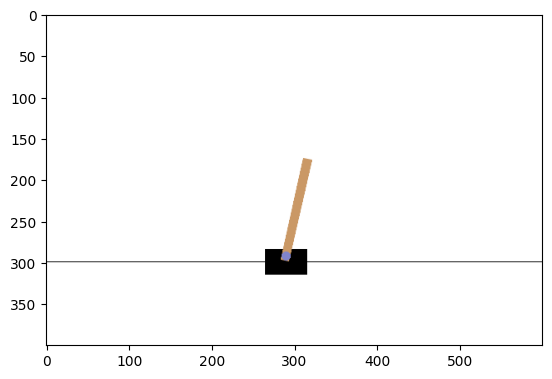

In [ ]:
env = gym.make("CartPole-v0")
env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

for i in range(50000):
  action = env.action_space.sample()
  print("step i",i,"action=",action)
  obs, reward, done, info = env.step(action)
  print("obs=",obs,"reward=",reward,"done=",done,"info=",info)
  screen = env.render(mode='rgb_array')

  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())

  if done:
    break

ipythondisplay.clear_output(wait=True)
env.close()
print("Iterations that were run:",i)

In [ ]:

# Initialize environment
env = gym.make("CartPole-v0")

# Print state and action space sizes
state_space_size = env.observation_space.shape[0]  # Get the size of the state space
action_space_size = env.action_space.n  # Get the size of the action space
print("State space size:", state_space_size)
print("Action space size:", action_space_size)

# Define a function to round the state values
def round_state(state):
    return tuple(round(x, 1) for x in state)

# Define a function to generate an episode
def generate_episode(env):
    episode = []  # Initialize an empty list to store the episode
    state = env.reset()  # Reset the environment to start a new episode
    state = round_state(state)  # Round the state values
    for _ in range(50000):
        action = np.random.randint(action_space_size)  # Choose a random action
        next_state, reward, done, _ = env.step(action)  # Take a step in the environment
        next_state = round_state(next_state)  # Round the next state values
        episode.append((state, action, reward))  # Append the state, action, and reward to the episode
        state = next_state  # Update the current state
        if done:  # If the episode is done
            break  # Exit the loop
    return episode  # Return the generated episode

# Off-Policy Monte Carlo Control algorithm
def off_MC_control(env, max_episodes, gamma):
    Q = defaultdict(lambda: np.zeros(action_space_size))  # Initialize Q-values
    C = defaultdict(lambda: np.zeros(action_space_size))  # Initialize visitation counts

    for episode_num in range(max_episodes + 1):  # Iterate over episodes
        episode = generate_episode(env)  # Generate an episode
        G, W = 0, 1  # Initialize return and importance sampling ratio

        for t in range(len(episode) - 1, -1, -1):  # Loop backwards through the episode
            state, action, reward = episode[t]  # Get state, action, and reward
            G = gamma * G + reward  # Update return
            C[state][action] += W  # Update visitation counts
            Q[state][action] += (G - Q[state][action]) * (W / C[state][action])  # Update Q-values
            pi_S_t = np.argmax(Q[state])  # Greedy policy
            if action != pi_S_t:  # Check if action is not optimal
                break  # Exit the loop
            W *= 1. / (1.0 / action_space_size)  # Update importance sampling ratio


        # Calculate and print average iterations
        total_iterations = sum([len(episode) for episode in episode])
        avg_iterations = total_iterations / (episode_num + 1)
        print("Episode:", episode_num, "Average iterations:", avg_iterations)

    return Q  # Return the learned Q-values

# Run Off-Policy Monte Carlo Control
Q = off_MC_control(env, 10, 1)


State space size: 4
Action space size: 2
Episode: 0 Average iterations: 75.0
Episode: 1 Average iterations: 18.0
Episode: 2 Average iterations: 17.0
Episode: 3 Average iterations: 11.25
Episode: 4 Average iterations: 13.8
Episode: 5 Average iterations: 16.0
Episode: 6 Average iterations: 6.0
Episode: 7 Average iterations: 10.125
Episode: 8 Average iterations: 11.333333333333334
Episode: 9 Average iterations: 4.8
Episode: 10 Average iterations: 3.272727272727273
